# Train Custom Model Using Scikit Learn - Bench Press
## 1. Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv('benchpress_with_scaled_angles.csv')

In [3]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,b_correct_up,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,153.626526,170.470252,48.070248,105.980023,64.562139,109.855044,152.282714,106.709343,37.642478,51.758124
1,b_correct_down,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,164.207168,44.629975,23.434606,101.919294,63.422402,107.710618,154.459397,110.921968,39.437054,57.581308
2,b_correct_down,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,117.675792,62.403361,4.246507,124.453244,64.934000,108.079105,153.044650,114.738666,38.354746,61.952723


In [4]:
print(df['class'].unique())

['b_correct_up' 'b_correct_down' 'b_excessive_arch_up'
 'b_excessive_arch_down' 'b_arms_spread_down' 'b_arms_spread_up']


In [5]:
df[df['class'] == 'b_correct_up']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,b_correct_up,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,153.626526,170.470252,48.070248,105.980023,64.562139,109.855044,152.282714,106.709343,37.642478,51.758124
4,b_correct_up,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,140.004166,164.824528,46.450212,111.923557,68.962632,110.126002,149.106618,115.346571,39.358527,63.642535
5,b_correct_up,0.310121,0.313170,0.639881,0.999996,0.297345,0.319019,0.693260,0.999997,0.298430,...,150.178137,163.647051,48.991755,100.375725,66.877861,110.604185,146.317567,114.508603,35.747130,63.041143
7,b_correct_up,0.336981,0.286422,0.439760,0.999998,0.329804,0.283867,0.492865,0.999998,0.331842,...,145.257497,163.407631,53.223506,95.649096,69.772188,110.276546,147.897141,134.610135,39.557304,78.621473
9,b_correct_up,0.329401,0.288978,0.521810,0.999999,0.320499,0.288602,0.571868,1.000000,0.322092,...,136.797887,161.758924,52.051634,107.767849,70.675503,108.853546,146.326002,118.943117,38.441040,65.861024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,b_correct_up,0.511722,0.361218,0.734899,1.000000,0.519617,0.361208,0.782905,0.999999,0.526837,...,131.367765,131.726002,52.116910,45.778707,111.048177,96.572493,129.275681,136.163775,42.270057,44.702578
795,b_correct_up,0.522448,0.359301,0.685669,1.000000,0.529138,0.359350,0.741602,0.999999,0.535176,...,123.454246,121.357584,46.036343,36.855936,110.572044,95.393802,129.720008,135.608756,41.372581,44.439156
797,b_correct_up,0.514979,0.364079,0.845882,1.000000,0.522700,0.366122,0.898016,1.000000,0.529844,...,117.280747,135.370400,51.833990,51.346410,112.038196,102.290207,130.763105,136.892319,42.641083,46.399481
800,b_correct_up,0.514738,0.363740,0.822302,0.999999,0.522630,0.365405,0.866516,0.999999,0.530004,...,128.595327,139.552534,54.770560,51.040544,113.445807,92.242096,128.906888,142.235770,40.688242,46.279170


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [8]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [9]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [10]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [11]:
fit_models['rc'].predict(X_test)

array(['b_arms_spread_down', 'b_excessive_arch_down', 'b_arms_spread_up',
       'b_correct_down', 'b_excessive_arch_down', 'b_arms_spread_down',
       'b_excessive_arch_down', 'b_arms_spread_up', 'b_arms_spread_up',
       'b_excessive_arch_up', 'b_arms_spread_up', 'b_arms_spread_down',
       'b_arms_spread_up', 'b_correct_down', 'b_arms_spread_up',
       'b_arms_spread_up', 'b_arms_spread_up', 'b_excessive_arch_up',
       'b_correct_down', 'b_excessive_arch_down', 'b_excessive_arch_down',
       'b_excessive_arch_down', 'b_excessive_arch_up',
       'b_excessive_arch_up', 'b_correct_down', 'b_excessive_arch_down',
       'b_arms_spread_down', 'b_excessive_arch_down', 'b_correct_up',
       'b_excessive_arch_up', 'b_arms_spread_down', 'b_correct_down',
       'b_excessive_arch_down', 'b_correct_up', 'b_arms_spread_down',
       'b_correct_up', 'b_correct_down', 'b_correct_down',
       'b_excessive_arch_down', 'b_arms_spread_up',
       'b_excessive_arch_down', 'b_excessive_arch_u

## 3.Evaluate and Serialize Model

In [12]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                       precision    recall  f1-score   support

   b_arms_spread_down       0.93      0.93      0.93        60
     b_arms_spread_up       0.91      0.94      0.92        51
       b_correct_down       1.00      0.96      0.98        48
         b_correct_up       1.00      0.97      0.99        37
b_excessive_arch_down       0.98      0.96      0.97        51
  b_excessive_arch_up       0.95      1.00      0.98        40

             accuracy                           0.96       287
            macro avg       0.96      0.96      0.96       287
         weighted avg       0.96      0.96      0.96       287


--- rc 모델 분류 결과 평가 ---
                       precision    recall  f1-score   support

   b_arms_spread_down       0.93      0.95      0.94        60
     b_arms_spread_up       0.92      0.90      0.91        51
       b_correct_down       1.00      0.94      0.97        48
         b_correct_up       0.95      0.97      0.96        37
b_ex

In [13]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9582
rc: 0.9477
rf: 0.9652
gb: 0.9477
--- precision ---
lr: 0.9591
rc: 0.9490
rf: 0.9659
gb: 0.9486
--- recall ---
lr: 0.9582
rc: 0.9477
rf: 0.9652
gb: 0.9477
--- f1-score ---
lr: 0.9584
rc: 0.9478
rf: 0.9651
gb: 0.9476


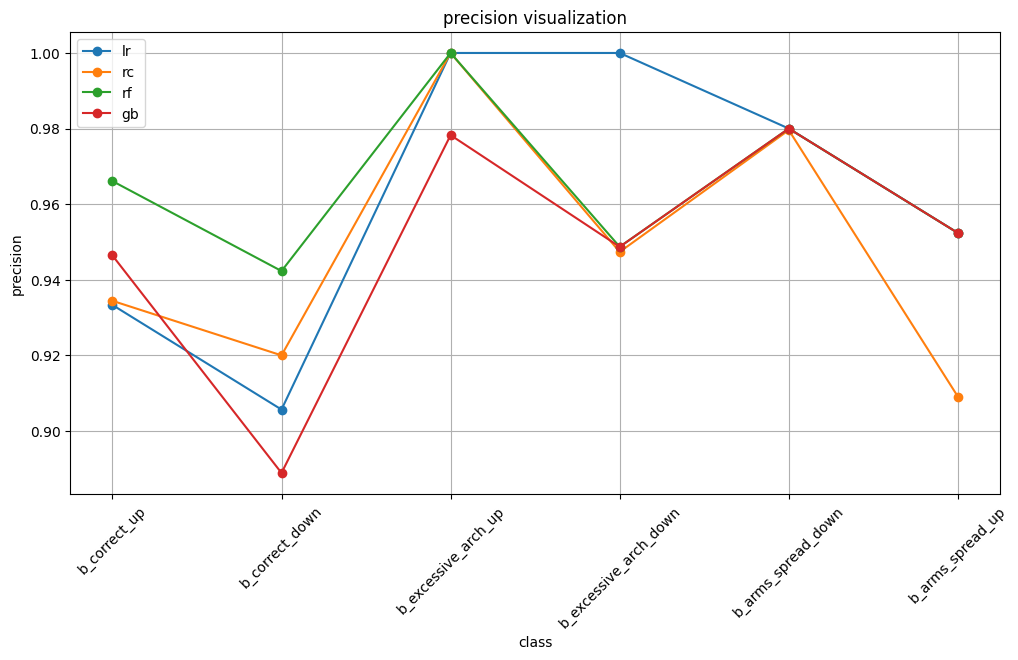

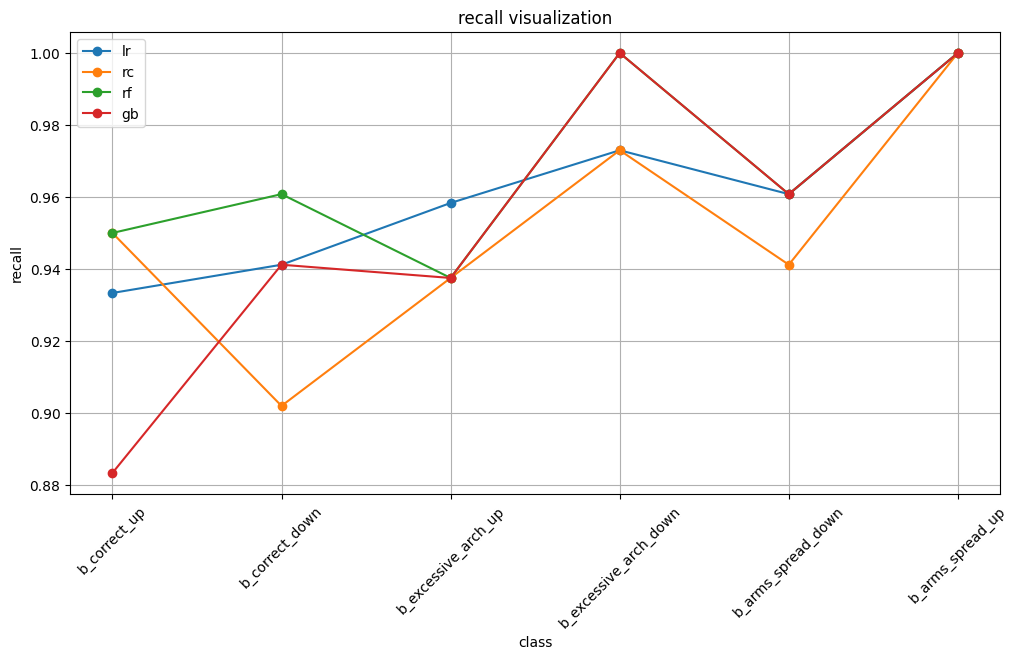

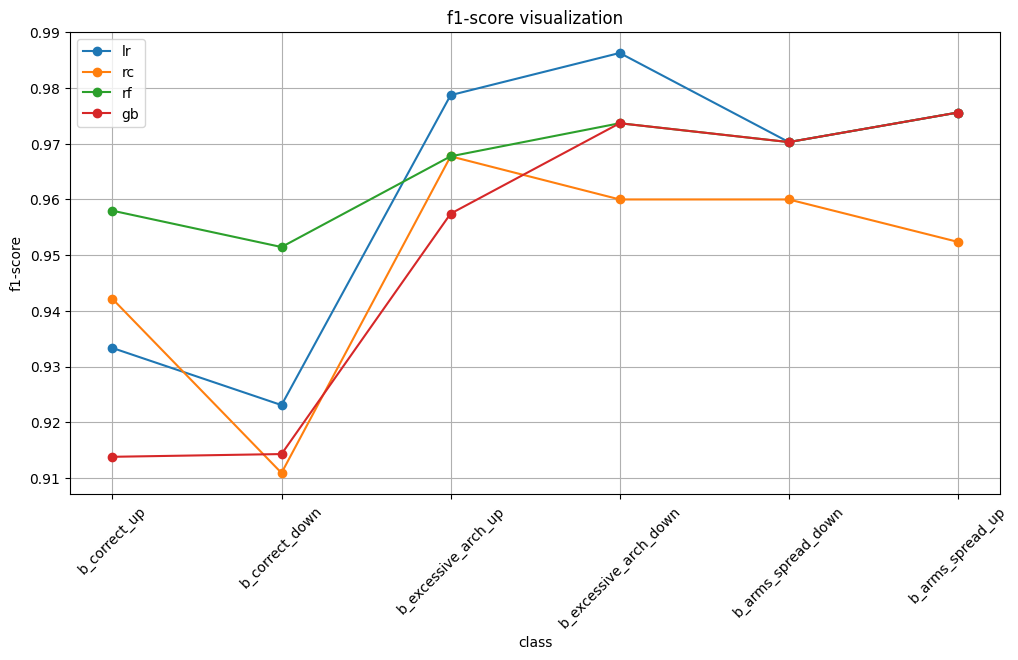

In [14]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [49]:
with open('benchpress.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)